# Airbnb Berlin Data

### Data


The data used in this notebook was sourced from the Inside Airbnb website. I will analyze two sets of data, one called 'listings' which has information about the available Airbnb rentals in Berlin, their respective neighbourhoods and roomtypes as well as their price per night and another dataset called 'reviews_summary' which contains every available review/comment for each of the rental spaces.

It can be downloaded here: https://www.kaggle.com/brittabettendorf/berlin-airbnb-data

(listings.csv and reviews_summary.csv)


### Objectives

1. Find out which neighbourhood is (on average) the most expensive in Berlin (listings dataset)
2. Find the adjectives that are being used the most in the comments - do visitors describe their experience positively or negatively? (reviews_summary dataset)
3. Find the neighbourhood with the highest ‚greatness-score‘ (comments containing the word ‚great‘ divided by the sum of comments - for each neighbourhood, listings & reviews_summary dataset)

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import queue

First I'm importing the csv data files into dataframes so I can easily explore the data:

In [2]:
listings = pd.read_csv('/Users/brit/Desktop/Kurse/data/berlin-airbnb-data/listings.csv')
reviews_summary = pd.read_csv('/Users/brit/Desktop/Kurse/data/berlin-airbnb-data/reviews_summary.csv')

### 1. Determine the most expensive neighbourhoods in Berlin

To get a better understanding of the listings dataset, I will first print out the first five entries as well as the column names that I will later use to proceed with the data.
My objective is to find out which neighbourhood is (on average) the most expensive in Berlin.

In [3]:
print(listings.head(5))

     id                                              name  host_id host_name  \
0  2015  Berlin-Mitte Value! Quiet courtyard/very central     2217       Ian   
1  2695                Prenzlauer Berg close to Mauerpark     2986   Michael   
2  3176                   Fabulous Flat in great Location     3718    Britta   
3  3309                 BerlinSpot Schöneberg near KaDeWe     4108      Jana   
4  7071                  BrightRoom with sunny greenview!    17391    Bright   

      neighbourhood_group             neighbourhood   latitude  longitude  \
0                   Mitte           Brunnenstr. Süd  52.534537  13.402557   
1                  Pankow  Prenzlauer Berg Nordwest  52.548513  13.404553   
2                  Pankow   Prenzlauer Berg Südwest  52.534996  13.417579   
3  Tempelhof - Schöneberg           Schöneberg-Nord  52.498855  13.349065   
4                  Pankow            Helmholtzplatz  52.543157  13.415091   

         room_type  price  minimum_nights  number_of_rev

To find out the names of all entries in the neighbourhood_group column, I will use the .unique() function. We can see that all entries are are listed under 12 different neighbourhood_groups.

In [4]:
listings.neighbourhood_group.unique()

array(['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilm.',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Reinickendorf',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Spandau'], dtype=object)

As prices for shared rooms will most likely differ a lot from prices for a whole apartment, we will have a look at the room_type column. There are three different types of entries 'Entire home/apt', 'Private room' and 'Shared room'.

In [5]:
listings.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

I now create a new dataframe, which is grouped by neighbourhood_group and each category of neighbourhood_group is then grouped by room_type to get the average price per room_type for each of the 12 neighbourhoods in Berlin.

In [6]:
listings_grouped = listings.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

In [7]:
print(listings_grouped)

neighbourhood_group       room_type      
Charlottenburg-Wilm.      Entire home/apt    104.386792
                          Private room       128.621697
                          Shared room         36.800000
Friedrichshain-Kreuzberg  Entire home/apt     80.951111
                          Private room        44.445568
                          Shared room         39.127273
Lichtenberg               Entire home/apt     69.211604
                          Private room        47.007833
                          Shared room         26.916667
Marzahn - Hellersdorf     Entire home/apt     74.862500
                          Private room        33.428571
                          Shared room         21.200000
Mitte                     Entire home/apt     99.936494
                          Private room        41.992133
                          Shared room         30.299065
Neukölln                  Entire home/apt     64.221657
                          Private room        35.179133
      

=> There seems to be an extremely high average price for shared rooms in **Pankow**, so we will have a closer look 
at the price distribution in the listings data set


In [8]:
listings['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

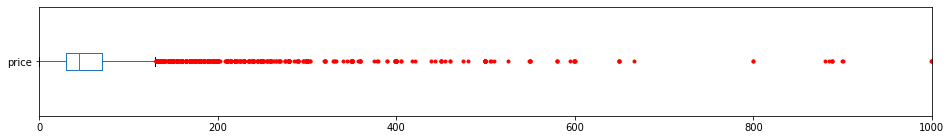

In [9]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
listings['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

In [10]:
q = listings['price'].quantile(0.99)
print(q)

270.0


75% of all prices for Airbnb rentals only cost up to 70 €. 
99% of all prices for Airbnb rentals only cost up to 270 € (while prices for rentals go up to a maximum of 9000 €/night))

=> For better comparability I'm cutting off prices higher than 270 €/night 
I will first find all their indexes and then drop them from the listings dataset.

In [11]:
index_new = listings[listings.price > 270].index
listings.drop(index_new , inplace=True)

Now I will visualize the data of the listings dataset, with only entries left that cost less than 270 €/night. By eliminating entries above 270 €/night, we can now see that the average price for a shared room in Pankow has reached a more realistic level.

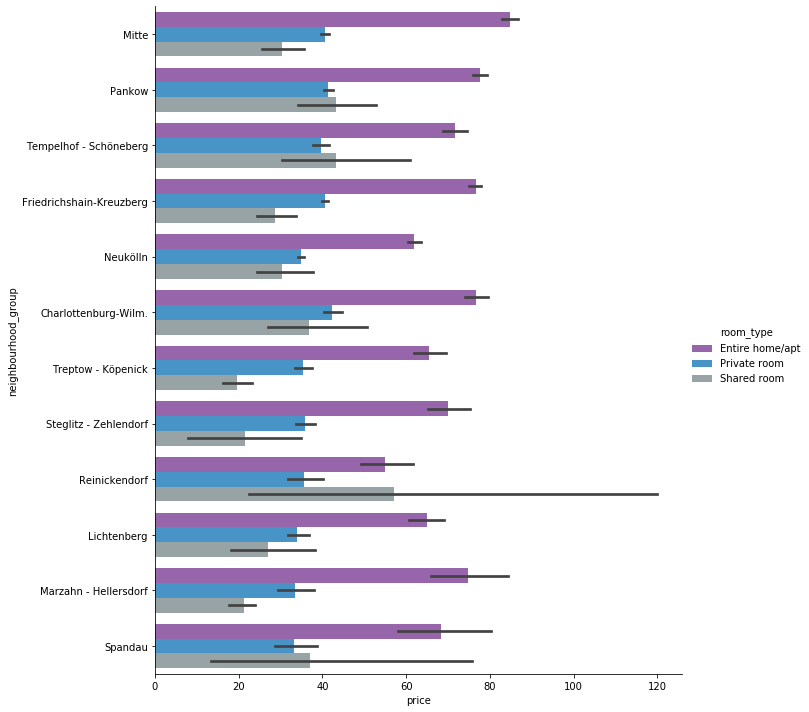

In [12]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.catplot(y="neighbourhood_group", x="price", hue="room_type", data=listings, palette = flatui, kind="bar", height=10)

In [13]:
listings_grouped = listings.groupby(['neighbourhood_group', 'room_type'])['price'].mean()
print(listings_grouped)

neighbourhood_group       room_type      
Charlottenburg-Wilm.      Entire home/apt    76.744552
                          Private room       42.402560
                          Shared room        36.800000
Friedrichshain-Kreuzberg  Entire home/apt    76.591912
                          Private room       40.551724
                          Shared room        28.759259
Lichtenberg               Entire home/apt    64.979239
                          Private room       34.041885
                          Shared room        26.916667
Marzahn - Hellersdorf     Entire home/apt    74.862500
                          Private room       33.428571
                          Shared room        21.200000
Mitte                     Entire home/apt    84.822581
                          Private room       40.564665
                          Shared room        30.299065
Neukölln                  Entire home/apt    61.898243
                          Private room       34.902718
                       

=> Visitors to Berlin have to pay the highest prices for an entire home in Mitte (on average 84,82 €), with a shared room in Treptow-Köpenick being the cheapest option for only around 19,50 € on average.

In [1]:
#judging by the error bar, there seem to be some odd values in the dataset for shared rooms in Reinickendorf 
#and Spandau
#should I leave this part out because it doesn't really make sense to go more into depth?


### 2. Analyzing the words used in the reviews/comments column

Without looking at the review score (which is available in a different dataset on the Inside Airbnb website) I want to have a look at the words that people who come to Berlin use to describe their stay - are they being rather positive or negative in their descriptions?

As the string search does not work with NaN values, we need to drop them first before iterating over each cell.

There are over 400.000 entries in the dataset, so we will only focus on the first 1000 entries in the dataset to get an idea of the words used most often in the comments.

In [15]:
reviews_summary.isna().sum()
reviews_summary = reviews_summary.dropna()
print(len(reviews_summary))

401467


To count the words used most often in the reviews, I will store them in a dictionary, counting the occurence of each word in the first 1000 reviews. I will filter out some commonly used words using the nltk stopwords. Then printing out the 40 words that have been used the most with a priority qeue. 

In [57]:
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('german') + stopwords.words('english')

count_words_1 = reviews_summary.comments.head(2000)
dict1 = {}

for line in count_words_1:
    for word in line.split():
        if word not in stop_words:
            if word in dict1:
                dict1[word] = dict1[word] + 1
            else:
                dict1[word] = 1
        else:
            pass

In [58]:
import queue

pq = queue.PriorityQueue()
for word, number in dict1.items():
    pq.put((-number, word))
    
for i in range(40):
    print(pq.get())

(-1232, 'The')
(-917, 'I')
(-811, 'apartment')
(-750, 'great')
(-544, 'stay')
(-516, 'We')
(-458, 'place')
(-436, 'nice')
(-382, 'location')
(-339, 'us')
(-333, 'Berlin')
(-330, 'would')
(-320, 'de')
(-308, 'really')
(-307, 'recommend')
(-303, 'Berlin.')
(-277, 'good')
(-265, 'room')
(-264, 'It')
(-255, 'well')
(-251, '-')
(-251, 'flat')
(-243, 'clean')
(-242, 'close')
(-242, 'everything')
(-227, 'Great')
(-222, 'perfect')
(-214, 'restaurants')
(-213, 'easy')
(-203, 'time')
(-194, 'Wolfram')
(-190, 'et')
(-176, 'definitely')
(-169, 'Wohnung')
(-163, 'host')
(-157, 'la')
(-156, 'apartment.')
(-152, 'super')
(-151, 'Very')
(-151, 'helpful')


Here we can see that the adjectives most often used in the reviews are 'nice' and 'great'.

=> So overall visitors who came to Berlin seem to have had quite a positive experience

Also the name 'Wolfram' is mentioned a few times, so let's find out more about him.

In [19]:
df_wolfram = reviews_summary[reviews_summary['comments'].str.contains("Wolfram")]
len(df_wolfram.listing_id.unique())

14

=> Wolfram seems to be listed for 14 different listing ids


In [20]:
print(df_wolfram.head(5))

     listing_id       id        date  reviewer_id reviewer_name  \
568       17409  1350474  2012-05-26      2064830      Jonathan   
569       17409  1376775  2012-05-29        12602        Nathan   
570       17409  1421239  2012-06-05      2278460        Sergio   
571       17409  2170680  2012-09-02      3003307       Paulina   
573       17409  2440170  2012-09-28      1699663       Cyrille   

                                              comments  
568  I stayed here for 37 nights and would very gla...  
569  Wolfram was a fantastic host-- helpful, attent...  
570  Wolfram es muy amable y dispuesto. Fue muy int...  
571  Wolfram was a very good host and really consid...  
573  It was awesome! Room is huge, Wolfram was so n...  


By looking at the comments it seems like => Wolfram is a cool guy!

### 3. Evaluate how 'great' the neighbourhoods are

I'd like to find the neighbourhoods with the highest **greatness-score** by counting the number of comments that use the word 'great' in the comments-columns, matching them with their respective neighbourhoods and dividing the sum by the total number of reviews for each neighbourhood.
 
First I create a new dataframe 'great_df' that consists of all reviews that contain the word 'great' in their comments and set the index to their 'listings_id'.

In [21]:
great_df = reviews_summary[reviews_summary.comments.map(lambda desc: "great" in desc)].set_index('listing_id')
print(great_df)

                   id        date  reviewer_id reviewer_name  \
listing_id                                                     
2015         69990732  2016-04-15     41944715        Hannah   
2015         94413135  2016-08-15     79022747        Helena   
2015        105812314  2016-10-03     40666870        Andrew   
2015        108776791  2016-10-17     13902297         Molly   
2015        112250225  2016-11-05     40117062         Elena   
...               ...         ...          ...           ...   
29556108    345869926  2018-11-06     59490435          Maya   
29605752    344319675  2018-11-03     48448074          Alix   
29623474    344219926  2018-11-03     26777336       Antonis   
29640657    343947591  2018-11-02    222267323       Shriram   
29640657    345497600  2018-11-05     72296860        Lenard   

                                                     comments  
listing_id                                                     
2015        Jan was very friendly and w

Now I am able to merge this new dataframe with the listings dataframe, matching each 'listings_id' from 'great_df' with the 'id' from 'listings'. This allows me to match every comment with a specific 'neighbourhood_group'.

In [22]:
merged = great_df.merge(listings, how='left', left_on='listing_id', right_on='id')

I can now count how many comments containing the word 'great' each 'neighbourhood_group' has and store it in a series called 'neighbourhood_greatness'. I will then count the total number of reviews for each 'neighbourhood_group' and store it in a series called 'review_total' and then concatenate both series and rename the columns.

In [23]:
neighbourhood_greatness = merged.groupby('neighbourhood_group')['neighbourhood_group'].count()
review_total = listings.groupby('neighbourhood_group')['number_of_reviews'].sum()

In [24]:
greatness_index = pd.concat([neighbourhood_greatness, review_total], axis=1)
greatness_index.columns = ['great_sum', 'reviews_sum']
print(greatness_index)

                          great_sum  reviews_sum
neighbourhood_group                             
Charlottenburg-Wilm.           4386        28406
Friedrichshain-Kreuzberg      25310        95860
Lichtenberg                    1484         9257
Marzahn - Hellersdorf           263         2408
Mitte                         23262       100912
Neukölln                      11861        45724
Pankow                        16762        69408
Reinickendorf                   653         5089
Spandau                         138         1572
Steglitz - Zehlendorf           664         5592
Tempelhof - Schöneberg         5290        26642
Treptow - Köpenick             1232         8098


Finally I will append another column, the 'greatness_score', by dividing the sum of reviews containing the word great by the total number of reviews for each 'neighbourhood_group'.

In [25]:
greatness_index['greatness_score'] = greatness_index.apply(lambda row: (row['great_sum']/row['reviews_sum']), axis=1)
greatness_index = greatness_index.sort_values(by=['greatness_score'], ascending=False)
print(greatness_index)

                          great_sum  reviews_sum  greatness_score
neighbourhood_group                                              
Friedrichshain-Kreuzberg      25310        95860         0.264031
Neukölln                      11861        45724         0.259404
Pankow                        16762        69408         0.241500
Mitte                         23262       100912         0.230518
Tempelhof - Schöneberg         5290        26642         0.198559
Lichtenberg                    1484         9257         0.160311
Charlottenburg-Wilm.           4386        28406         0.154404
Treptow - Köpenick             1232         8098         0.152136
Reinickendorf                   653         5089         0.128316
Steglitz - Zehlendorf           664         5592         0.118741
Marzahn - Hellersdorf           263         2408         0.109219
Spandau                         138         1572         0.087786


In [26]:
greatness_index.reset_index()

,neighbourhood_group,great_sum,reviews_sum,greatness_score
0,Friedrichshain-Kreuzberg,25310,95860,0.264031
1,Neukölln,11861,45724,0.259404
2,Pankow,16762,69408,0.241500
3,Mitte,23262,100912,0.230518
4,Tempelhof - Schöneberg,5290,26642,0.198559
5,Lichtenberg,1484,9257,0.160311
6,Charlottenburg-Wilm.,4386,28406,0.154404
7,Treptow - Köpenick,1232,8098,0.152136
8,Reinickendorf,653,5089,0.128316
9,Steglitz - Zehlendorf,664,5592,0.118741


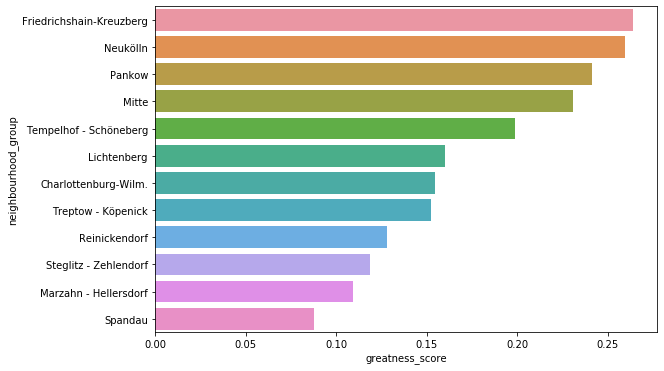

In [27]:
plt.figure(figsize=(9,6))
sns.barplot(x= 'greatness_score', y=greatness_index.index, data=greatness_index)

=> The plot shows that Friedrichshain-Kreuzberg is the neighbourhood with the highest 'greatness-score' in Berlin, Spandau has the lowest.